In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = "/Users/anirudhravipudi/Desktop/AI/Practice/SMSSpamCollection.txt"
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

print(df.head())
print(df['label'].value_counts())

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64

✅ Accuracy: 0.9919282511210762

📉 Confusion Matrix:
 [[966   0]
 [  9 140]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115




✅ Accuracy: 0.9668161434977578

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



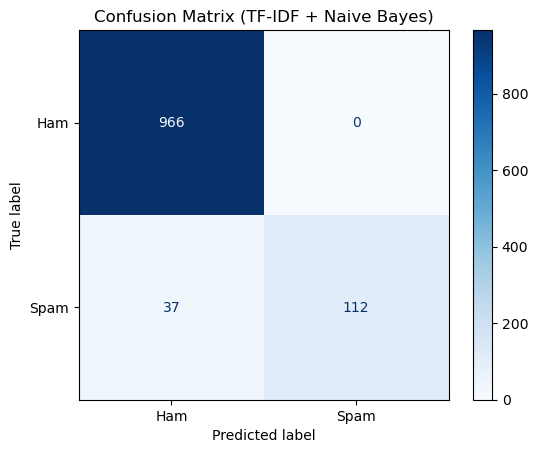

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📘 TF-IDF Vectorization instead of CountVectorizer
tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# 🧠 Train the same MultinomialNB model
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# 📊 Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 🔥 Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Ham', 'Spam'], cmap='Blues')
plt.title("Confusion Matrix (TF-IDF + Naive Bayes)")
plt.show()